### Student Information
Name:呂佳芸

Student ID:111071038

GitHub ID:gill9307

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [34]:
### Begin Assignment 


# Data Preparation

In [41]:

import pandas as pd
dataset=pd.read_csv('C:/Users/呂佳芸/DM/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
dataset[0:5]
len(dataset)
dataset.text
dataset.columns



Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

Since some of the information in the dataset might not be important, like post_id and author, so we ignore them in our data

In [ ]:
data_select=['type', 'datetime', 'subreddit', 'title', 
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label']

data=dataset[data_select]
data[:10]


,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,2,NaN,NaN,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,"['HLGN', 'Hurry', 'moon']",1.0


# Data transformation

In [44]:
data[:10][["text","sentiment"]]

,text,sentiment
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,1.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,0.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
6,Trump will respond to china increasing their t...,-1.0
7,Confirmed not a trap. Its been like this for p...,1.0
8,Am I the only one seeing the cup & handle brea...,1.0
9,HLGN is $10. Hurry and catch it now before it ...,0.0


fetch the records which sentiment is 1(positive)

In [45]:
data.loc[dataset["sentiment"]==1][:5] 
 

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0


In [46]:
data[data["sentiment"]==1][::10][0:5]

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
25,comment,2025-04-12 1:26:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,4,NaN,NaN,"You see, Target, pissing off a good chunk of y...",0.758333,0.233333,1.0,"['customer', 'base', 'chunk', 'Target', 'idea']",-1.0
56,comment,2025-04-11 13:33:07,stocks,BREAKING: China raises tariffs on U.S. goods t...,-1,NaN,NaN,"To be fair, Chinese exports to the US make up ...",0.466667,0.233333,1.0,"['portion', 'degree', 'US', 'kinda', '’', 'way...",0.0
73,comment,2025-04-11 15:32:07,stocks,Is the market in complete denial right now?,1,NaN,NaN,"Look, the USA somehow thought a second term f...",0.460000,0.040000,1.0,"['USA', 'fool', 'Look', 'Trump', 'world', 'cul...",-1.0
96,comment,2025-04-12 2:05:07,wallstreetbets,Someone post the hotline please.,1,NaN,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",-1.0


# Data mining using pandas

### Dealing missing values

In [48]:
import helpers.data_mining_helpers as dmh


In [47]:
data.isnull()

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,True,True,False,False,False,False,False,False


In [50]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,783,783,0,0,0,0,0,0


In [52]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [51]:
len(data)

847

Now we found that the missing value of two columns(downvotes,upvote_ratio) is too much, we might cosider them as not important feature, so we need to delete them.

If we delete row with null, we will left few data.
So now we decide to delete the columns.

In [53]:
data.drop(columns=["downvotes","upvote_ratio"],inplace=True)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_27376\2792768801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["downvotes","upvote_ratio"],inplace=True)


In [56]:
data
#len(data)

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,1,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),2,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,10,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [57]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))


,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0


In [58]:
len(data)

847

### Dealing duplicate data

In [59]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [60]:
sum(data.duplicated())

0

There is not duplicated data, so we don't need to delete any data in this part.

# Data Preprocessing

### Sampling

In [61]:
data_sample=data.sample(n=100)

In [62]:
data_sample[0:10]

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
836,post,2025-03-26 12:18:30,stockstobuytoday,Futures Market,1,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0
404,post,2025-03-24 11:28:08,stockstobuytoday,What are you buying (or avoiding) if this down...,0,The stock market is wobbling. Big indexes like...,0.605556,-0.239815,-1.0,"['P', 'plague', 'Nasdaq', 'Money Machine Newsl...",-1.0
311,comment,2025-04-11 13:41:04,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,1,I know. America is fuxked and stupid.,1.000000,-0.800000,-1.0,['America'],-1.0
432,post,2025-04-11 16:01:14,stockstobuytoday,Crypto Gainers - Coinbase,1,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.000000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
396,comment,2025-04-11 16:03:15,stocks,BREAKING: China raises tariffs on U.S. goods t...,1,It's basically just bickering with math at thi...,0.533333,0.150000,1.0,"['stuff', 'point', 'math']",-1.0
823,comment,2025-04-11 15:45:09,StockMarket,The Trump administration is begging Xi Jinping...,1,I goes we’ll see just who holds all the cards,0.000000,0.000000,0.0,['see'],0.0
519,comment,2025-04-12 3:19:30,wallstreetbets,Someone post the hotline please.,1,Found the killjoy.,0.000000,0.000000,0.0,['killjoy'],0.0
31,comment,2024-08-17 5:32:56,stockstobuytoday,Best EV / green mining stocks?,1,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.107880,1.0,"['Jeep', 'program', 'spike', '+', 'Honda', 'Eq...",0.0
284,post,2025-04-06 16:00:59,stockstobuytoday,Crypto Gainers - Coinbase,1,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.000000,0.000000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
464,comment,2025-04-11 21:20:06,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,12,Has Xi called yet?\r\n\r\nCan someone check if...,0.000000,0.000000,0.0,"['phone', 'Xi', 'Has', 'someone']",-1.0


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


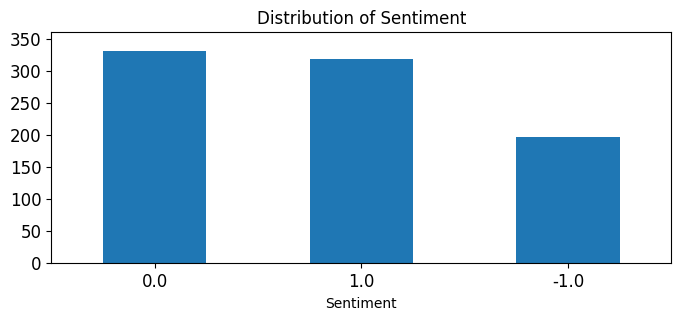

In [ ]:


print(data.sentiment.value_counts())

data.sentiment.value_counts().plot(kind='bar',
                                   title='Distribution of Sentiment',
                                   xlabel='Sentiment',
                                   ylim = [0, data.sentiment.value_counts().max()+30], 
                                   rot = 0, fontsize = 12, figsize = (8,3))
plt.show()





sentiment
 1.0    43
 0.0    40
-1.0    17
Name: count, dtype: int64


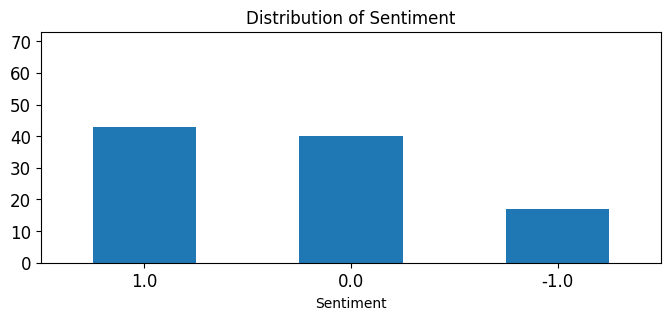

In [74]:
print(data_sample.sentiment.value_counts())

data_sample.sentiment.value_counts().plot(kind='bar',
                                   title='Distribution of Sentiment',
                                   xlabel='Sentiment',
                                   ylim = [0, data_sample.sentiment.value_counts().max()+30], 
                                   rot = 0, fontsize = 12, figsize = (8,3))
plt.show()



<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

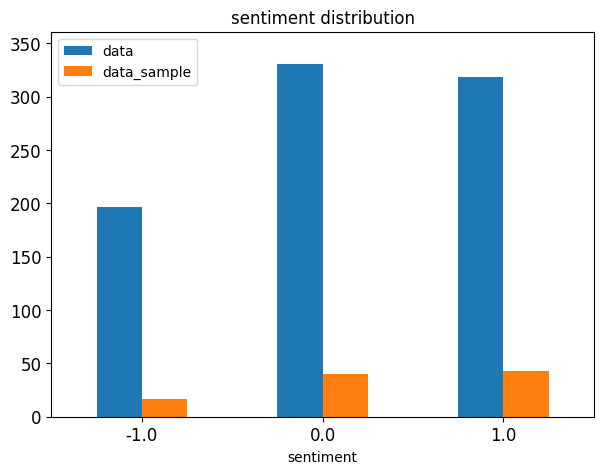

In [75]:
new_df=pd.DataFrame({"data":data.sentiment.value_counts(),
                    "data_sample":data_sample.sentiment.value_counts()})
new_df.plot(kind='bar', title = 'sentiment distribution',
               ylim = [0, max(data.sentiment.value_counts().max(),data_sample.sentiment.value_counts().max())+30], 
               rot = 0, fontsize = 12, figsize = (7,5))

It seems the distribution from data and sampling one are slightly different

### Feature creation

create feature: word frequency

In [76]:

import nltk
nltk.download("punkt") #斷句model
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\呂佳芸\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\呂佳芸\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [77]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))


C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_27376\3033617486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))


In [80]:
data[:5]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

### Feature subset selection

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


Now we delete some meaningless words with function from countvector

In [95]:
for i in data.text:
    analyze(i)


count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts)

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
  (np.int32(1), np.int32(3696))	1
  (np.int32(1), np.int32(388))	1
  (np.int32(1), np.int32(2024))	2
  (np.int32(1), np.int32(2310))	1
  (np.int32(1), np.int32(4244))	1
  (np.int32(1), np.int32(1168))	1
  (np.int32(1), np.int32(3858))	1
  (np.int32(1), np.int32(1409))	1
  (np.int32(1), np.int32(2402))	1
  (np.int32(1), np.int32(538))	1
  (np.int32(1), np.int32(1083))	1
  (np.int32(1), np.int32(175))	2
  (np.int32(1), np.int32(3628))	1
  (np.int32(1), np.int32(2161))	1
  (np.int32(1), np.int32(3848))	1
  (np.int32(1), np.int32(1568))	1
  (np.int32(1), np.int32(2878))	1
  (np.int32(1), np.int32(2645))	1
  (np.int32(1), np.int32(887))	1
  (np.int32(1), np.int32(3477))	1
  (np.int32(1), np.int32(1412))	2
  (np.int32(1), np.int32(3795))	1
  :	:
  (np.int32(843), np.int32(3866))	1
  (np.int32(843), np.int32(697))	1
  (np.int32(843), np.int32(4229))	1
  (np.int32(843), np.int32(3113))	1
  (np.

In [97]:
data_counts.shape

(847, 4346)

term-document matrix

[654, 114, 25, 759, 281, 250, 228, 142, 754, 104, 692, 758, 558, 89, 604]
term_idx: [175, 289, 327, 374, 388, 406, 486, 675, 680, 697, 796, 1212, 1409, 1604, 1639]
[[ 0  1  1  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 11  2  0  1  1  0  1  2  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  2  1  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0]]


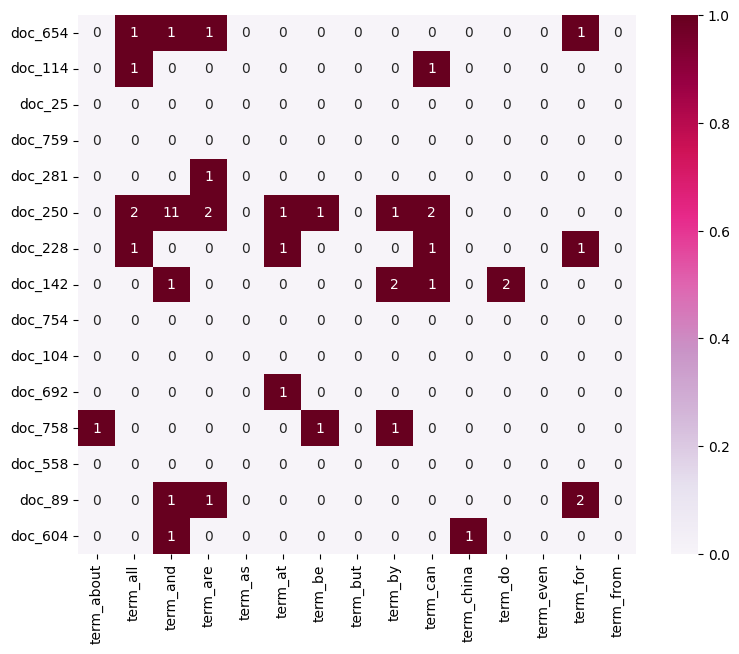

In [101]:
import seaborn as sns
import random
import numpy as np


random.seed(42)
doc_idx=random.sample(range(len(data)),15)
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_idx=[]
j=0
for i in range(len(term_frequencies)):
    if term_frequencies[i]>50:
        j+=1
        term_idx.append(i)
    if j==15:
        break

print(doc_idx)
print("term_idx:",term_idx)
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[term_idx]]
plot_y=["doc_"+ str(i) for i in doc_idx]
plot_z=data_counts[np.ix_(doc_idx, term_idx)].toarray()
print(plot_z)
df_todraw=pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(9, 7))
ax=sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Attribure transformation

term frequency

In [102]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
print(term_frequencies)

[4 6 1 ... 1 1 1]


Sort the term frequencies in descending order

In [106]:
import plotly.express as pe
term_index=np.argsort(term_frequencies)[::-1][:300]

plot_x=count_vect.get_feature_names_out()[term_index]
plot_y=term_frequencies[term_index]

fig=pe.bar(x=plot_x,y=plot_y)
fig.show()

Change the frequency variable into log-scale

In [110]:
import math
term_index=np.argsort(term_frequencies)[::-1][:300]

plot_x=count_vect.get_feature_names_out()[term_index]
plot_y=term_frequencies[term_index]
y_values=[math.log(i) for i in plot_y]



fig=pe.bar(x=plot_x,
             y=y_values)
fig.show()





# Phase 2

In [22]:
### Begin Assignment Here